# Random Forest Classifier and Random Forest Regressor

### Random Forest Classifier

In [3]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
# Load libraries
import pandas as pd
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [4]:
df = pd.read_csv("https://github.com/Pedro3141/Pawpularity/raw/main/train.csv")
df.head()

,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity
0,0007de18844b0dbbb5e1f607da0606e0,0,1,1,1,0,0,1,0,0,0,0,0,63
1,0009c66b9439883ba2750fb825e1d7db,0,1,1,0,0,0,0,0,0,0,0,0,42
2,0013fd999caf9a3efe1352ca1b0d937e,0,1,1,1,0,0,0,0,1,1,0,0,28
3,0018df346ac9c1d8413cfcc888ca8246,0,1,1,1,0,0,0,0,0,0,0,0,15
4,001dc955e10590d3ca4673f034feeef2,0,0,0,1,0,0,1,0,0,0,0,0,72


In [5]:
#change Pawpularity into categorical
category = pd.cut(df.Pawpularity,bins=[0,10,20,30,40,50,60,70,80,90,100],labels=[0,1,2,3,4,5,6,7,8,9])
df.insert(14,'Level',category)
df.head()

,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity,Level
0,0007de18844b0dbbb5e1f607da0606e0,0,1,1,1,0,0,1,0,0,0,0,0,63,6
1,0009c66b9439883ba2750fb825e1d7db,0,1,1,0,0,0,0,0,0,0,0,0,42,4
2,0013fd999caf9a3efe1352ca1b0d937e,0,1,1,1,0,0,0,0,1,1,0,0,28,2
3,0018df346ac9c1d8413cfcc888ca8246,0,1,1,1,0,0,0,0,0,0,0,0,15,1
4,001dc955e10590d3ca4673f034feeef2,0,0,0,1,0,0,1,0,0,0,0,0,72,7


In [6]:
feature_cols = ['Subject Focus','Eyes','Face','Near', 'Action', 'Accessory', 'Group', 'Collage', 'Human', 'Occlusion', 'Info', 'Blur']


In [7]:
X = df[feature_cols]
y =  df.Level

# Randomly splitting the original dataset into training set and testing set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=3)

In [8]:
my_RandomForest = RandomForestClassifier(n_estimators = 19, bootstrap = True, random_state=3)

# for training:  my_RandomForest.fit 
# for testing/prediction:  my_RandomForest.predict
my_RandomForest.fit(X_train,y_train)
my_RandomForest.fit(X_train,y_train)
y_predict = my_RandomForest.predict(X_test)
score = accuracy_score(y_test,y_predict)
print('Random Forest accuracy: ' + str(score))


Random Forest accuracy: 0.2711815561959654


In [9]:
# Estimating the probability (likelihood) of Each Label: 
y_predict_prob = my_RandomForest.predict_proba(X_test)

# True Positive Rate (TPR) and False Positive Rate (FPR)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_prob[:,1], pos_label=1)
# print(fpr)
# print(tpr)

# AUC:
AUC = metrics.auc(fpr, tpr)
print("AUC: " + str(AUC))

AUC: 0.5231255504651662


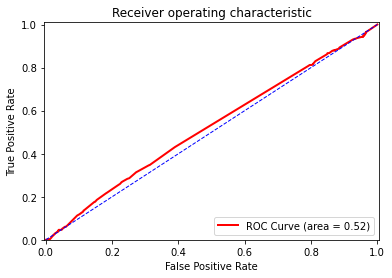

In [10]:
# Importing the "pyplot" package of "matplotlib" library of python to generate 
# graphs and plot curves:
import matplotlib.pyplot as plt

# The following line will tell Jupyter Notebook to keep the figures inside the explorer page 
# rather than openng a new figure window:
%matplotlib inline

plt.figure()

# Roc Curve:
plt.plot(fpr, tpr, color='red', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

### Random Forest Regressor

In [28]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(max_depth=4, random_state=0)
feature_cols = ['Subject Focus','Eyes','Face','Near','Action','Accessory','Group','Collage','Human','Occlusion','Info','Blur']
X = df[feature_cols]
y = df['Pawpularity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=6)

regr.fit(X_train, y_train)
y_2 = regr.predict(X_test)

mse = metrics.mean_squared_error(y_test, y_2)
rmse = np.sqrt(mse)
print('RMSE: ' + str(rmse))

RMSE: 20.584236433167302


Using Cross-Validation

In [29]:
from sklearn.model_selection import cross_val_score
# Using CV
regr = RandomForestRegressor(max_depth=4, random_state=0)
feature_cols = ['Subject Focus','Eyes','Face','Near','Action','Accessory','Group','Collage','Human','Occlusion','Info','Blur']
X = df[feature_cols]
y = df['Pawpularity']


mse_list = cross_val_score(regr, df[feature_cols], y, cv=10, scoring='neg_mean_squared_error')
rmse_list = np.sqrt(-mse_list)
rmse = rmse_list.mean()
print('RMSE: ' + str(rmse))

RMSE: 20.57036174539035
